In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
World_Happiness_df_2015 = pd.read_csv("Data/2015.csv")
World_Happiness_df_2016 = pd.read_csv("Data/2016.csv")
World_Happiness_df_2017 = pd.read_csv("Data/2017.csv")
World_Happiness_df_2018 = pd.read_csv("Data/2018.csv")
World_Happiness_df_2019 = pd.read_csv("Data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
World_Happiness_df_2015.shape, World_Happiness_df_2016.shape, World_Happiness_df_2017.shape, World_Happiness_df_2018.shape, World_Happiness_df_2019.shape

((158, 12), (157, 13), (155, 12), (156, 9), (156, 9))

In [4]:
World_Happiness_df_2015.head(2) 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [5]:
World_Happiness_df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
World_Happiness_df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [7]:
World_Happiness_df_2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [8]:
World_Happiness_df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [9]:
World_Happiness_df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
World_Happiness_df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
World_Happiness_df_2015.describe(include='object')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [12]:
World_Happiness_df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [13]:
World_Happiness_df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [14]:
World_Happiness_df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [15]:
World_Happiness_df_2016.describe(include='object')

,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


In [16]:
World_Happiness_df_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [17]:
World_Happiness_df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [18]:
World_Happiness_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [19]:
World_Happiness_df_2017.describe(include="object")

,Country
count,155
unique,155
top,Norway
freq,1


In [20]:
World_Happiness_df_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [21]:
World_Happiness_df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [22]:
World_Happiness_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [23]:
World_Happiness_df_2018.describe(include="object")

,Country or region
count,156
unique,156
top,Finland
freq,1


In [24]:
World_Happiness_df_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [25]:
World_Happiness_df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [26]:
World_Happiness_df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [27]:
World_Happiness_df_2019.describe(include="object")

,Country or region
count,156
unique,156
top,Finland
freq,1


In [28]:
World_Happiness_df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [29]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [30]:
# data is exist for the 2015 to 2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [31]:
#After reviewing the columns in all datasets, we can confirm that they are consistent.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# The data is appropriate for the analysis as it includes key variables like "Happiness Score,"
#  "Economy (GDP per Capita)," and "Health (Life Expectancy)" across multiple years and regions. 
# No columns will be removed, ensuring a comprehensive analysis of global happiness trends.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


##### WorldHappiness_2015


In [33]:
World_Happiness_df_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [34]:
# Check if there is any duplicated rows
World_Happiness_df_2015.duplicated().sum()

np.int64(0)

In [35]:
World_Happiness_df_2015['Happiness Rank'].duplicated().sum()

np.int64(1)

In [36]:
#two Country same Rank
World_Happiness_df_2015[World_Happiness_df_2015['Happiness Rank'].duplicated(keep=False)]


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [37]:
#Check df2015 has "-"
World_Happiness_df_2015.astype(str).apply(lambda x: '-' in x)

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [38]:
World_Happiness_df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### World_Happiness_df_2016

In [39]:
World_Happiness_df_2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [40]:
# Check if there is any duplicated rows
World_Happiness_df_2016.duplicated().sum()

np.int64(0)

In [41]:
#Check duplicated rows in colums Happiness Rank
World_Happiness_df_2016['Happiness Rank'].duplicated().sum()

np.int64(3)

In [42]:
#two Country same Rank
World_Happiness_df_2016[World_Happiness_df_2016['Happiness Rank'].duplicated(keep=False)]


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416


In [43]:
World_Happiness_df_2016.astype(str).apply(lambda x: '-' in x)

Country                          False
Region                           False
Happiness Rank                   False
Happiness Score                  False
Lower Confidence Interval        False
Upper Confidence Interval        False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Dystopia Residual                False
dtype: bool

In [44]:
World_Happiness_df_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

### WWorld_Happiness_df_2017

In [45]:
World_Happiness_df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [46]:
# Check if there is any duplicated rows
World_Happiness_df_2017.duplicated().sum()

np.int64(0)

In [47]:
#Check duplicated rows in colums Happiness Rank
World_Happiness_df_2017['Happiness.Rank'].duplicated().sum()

np.int64(0)

In [48]:
World_Happiness_df_2017.astype(str).apply(lambda x: '-' in x)

Country                          False
Happiness.Rank                   False
Happiness.Score                  False
Whisker.high                     False
Whisker.low                      False
Economy..GDP.per.Capita.         False
Family                           False
Health..Life.Expectancy.         False
Freedom                          False
Generosity                       False
Trust..Government.Corruption.    False
Dystopia.Residual                False
dtype: bool

In [49]:
World_Happiness_df_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

### World_Happiness_df_2018

In [50]:
World_Happiness_df_2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [51]:
# Check if there is any duplicated rows
World_Happiness_df_2018.duplicated().sum()

np.int64(0)

In [52]:
#Check duplicated rows in colums Happiness Rank
World_Happiness_df_2018['Overall rank'].duplicated().sum()

np.int64(0)

In [53]:
World_Happiness_df_2018.astype(str).apply(lambda x: '-' in x)

Overall rank                    False
Country or region               False
Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
dtype: bool

In [54]:
World_Happiness_df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

### World_Happiness_df_2019

In [55]:
World_Happiness_df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [56]:
# Check if there is any duplicated rows
World_Happiness_df_2019.duplicated().sum()

np.int64(0)

In [57]:
#Check duplicated rows in colums Happiness Rank
World_Happiness_df_2019['Overall rank'].duplicated().sum()

np.int64(0)

In [58]:
World_Happiness_df_2019.astype(str).apply(lambda x: '-' in x)

Overall rank                    False
Country or region               False
Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
dtype: bool

In [59]:
World_Happiness_df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [60]:
#Display number missing values per column

In [61]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [62]:
# check columns types 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [65]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [66]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [67]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


### World_Happiness_df_2017

In [70]:
World_Happiness_df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [73]:
World_Happiness_df_2017.rename(columns={"Happiness.Rank":"Happiness Rank"},inplace=True)

### World_Happiness_df_2018

In [74]:
World_Happiness_df_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [76]:
World_Happiness_df_2018.rename(columns={'Overall rank':'Happiness Rank'},inplace=True)

### World_Happiness_df_2019

In [77]:
World_Happiness_df_2019.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [78]:
World_Happiness_df_2019.rename(columns={'Overall rank':'Happiness Rank'},inplace=True)

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

### World_Happiness_df_2015

In [91]:
World_Happiness_df_2015.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


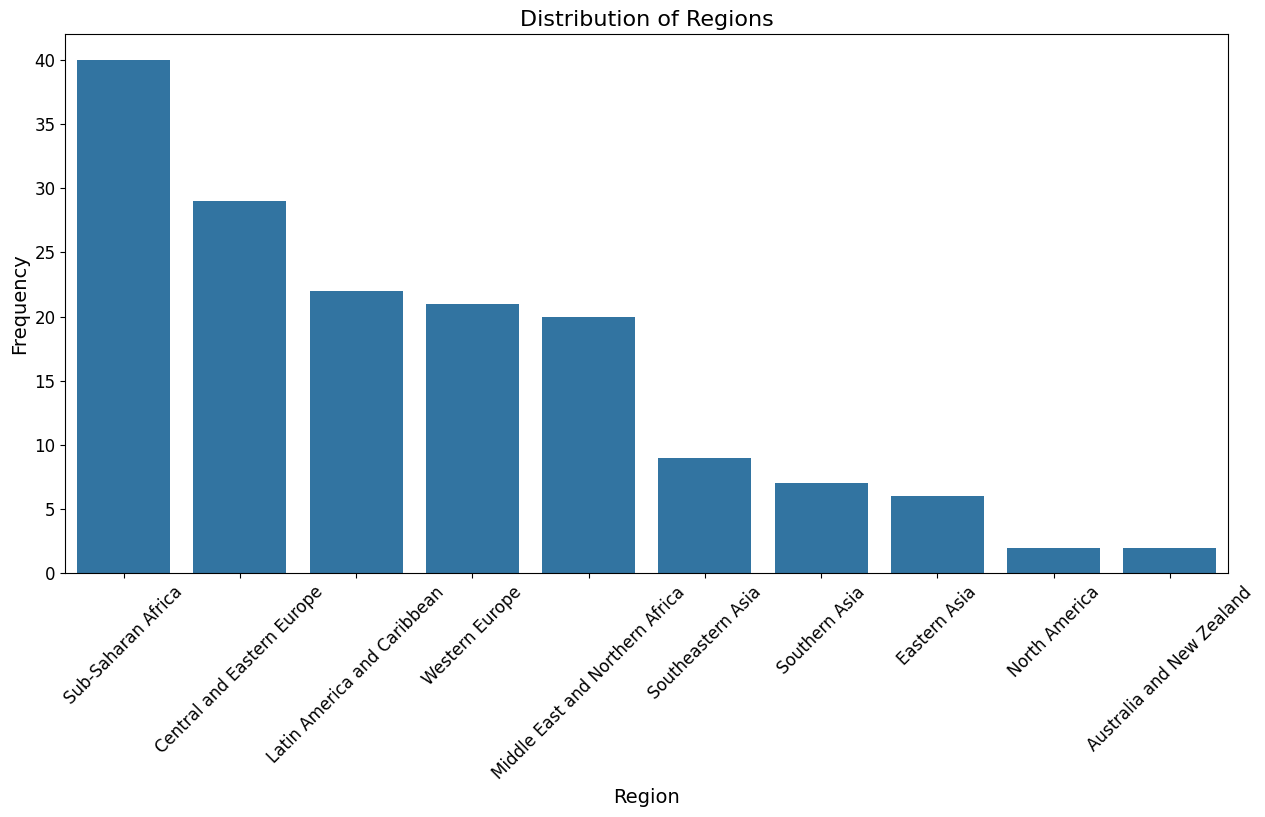

In [ ]:
plt.figure(figsize=(15, 7)) 
sns.countplot(x='Region', data=World_Happiness_df_2015, order=World_Happiness_df_2015['Region'].value_counts().index)

plt.title('Distribution of Regions', fontsize=16) 
plt.xlabel('Region', fontsize=14) 
plt.ylabel('Frequency', fontsize=14)  
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

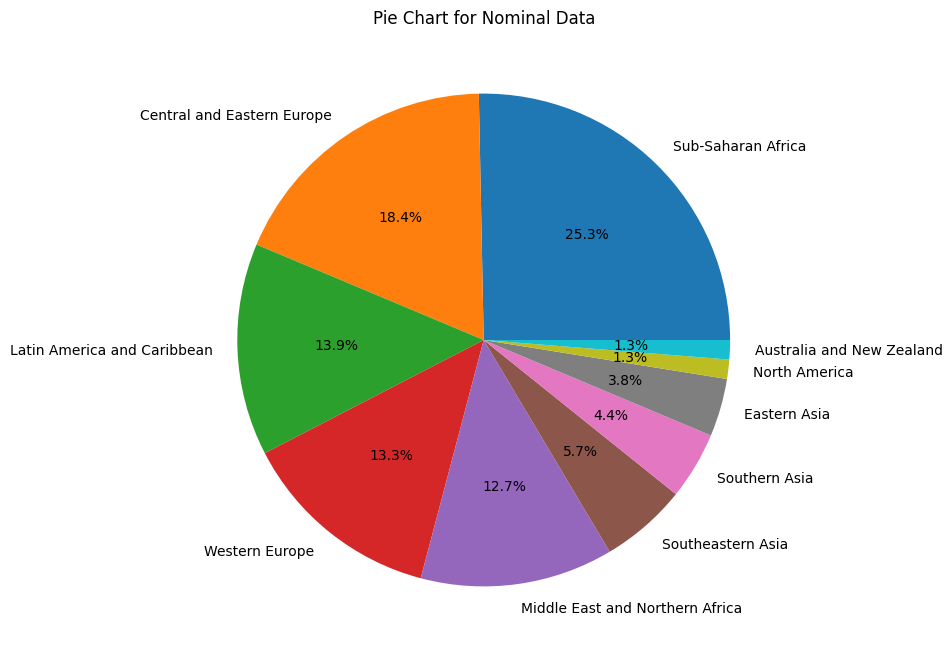

In [88]:
World_Happiness_df_2015['Region'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pie Chart for Nominal Data')
plt.ylabel('')  # Remove default ylabel
plt.show()


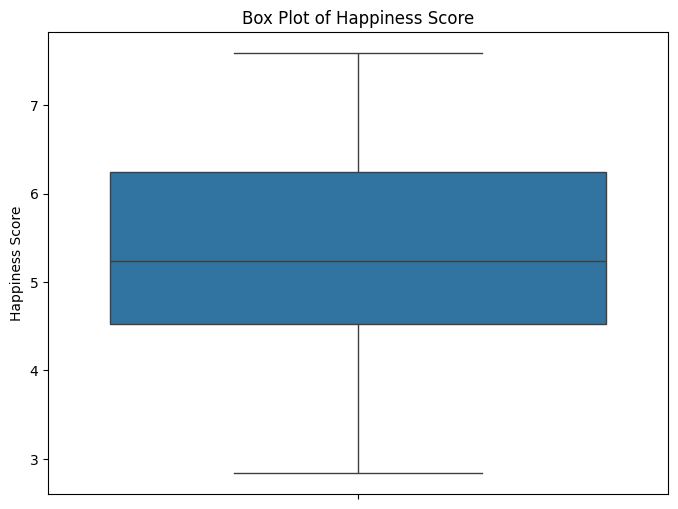

In [ ]:
# Example: Box plot for Happiness Score
plt.figure(figsize=(8, 6))
sns.boxplot(y=World_Happiness_df_2015['Happiness Score'])
plt.title('Box Plot of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()


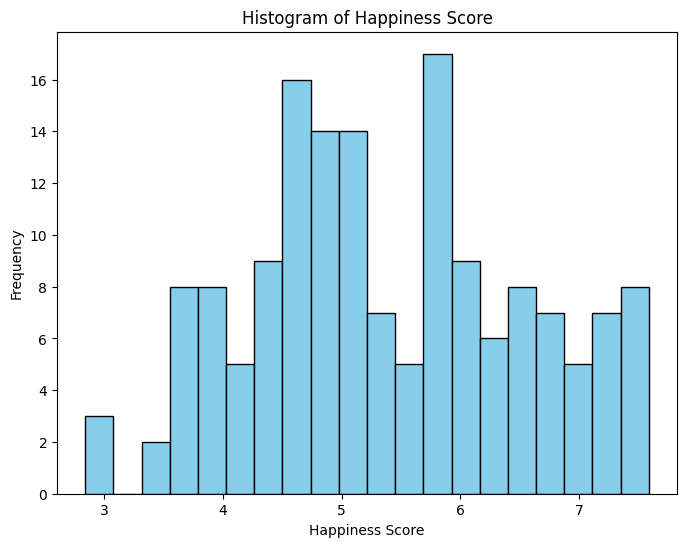

In [90]:
# Example: Histogram for Happiness Score
plt.figure(figsize=(8, 6))
plt.hist(World_Happiness_df_2015['Happiness Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


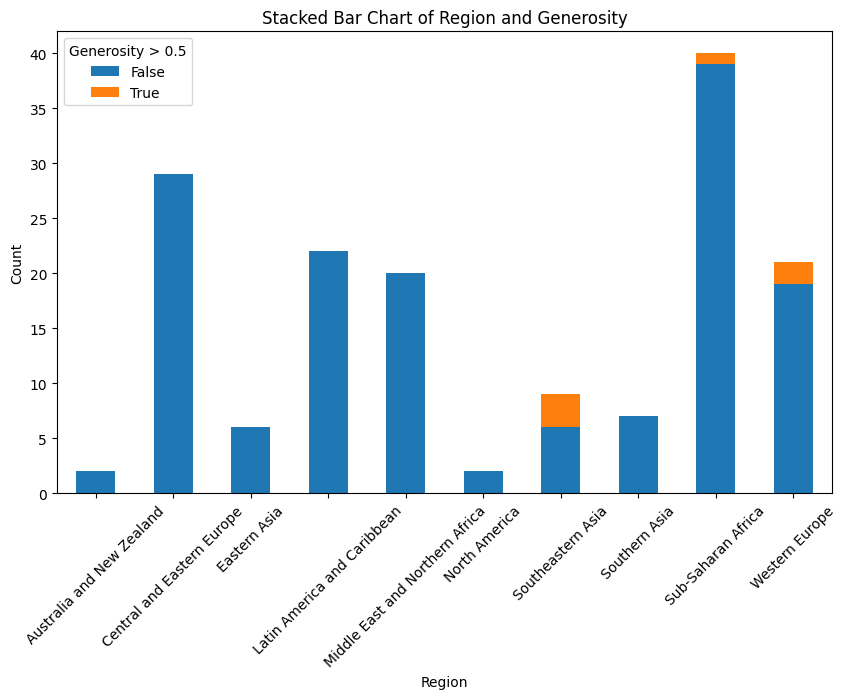

In [139]:
# Example: Region vs another categorical variable
crosstab = pd.crosstab(World_Happiness_df_2015['Region'], World_Happiness_df_2015['Generosity'] > 0.5)
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Region and Generosity')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Generosity > 0.5')
plt.xticks(rotation=45)
plt.show()

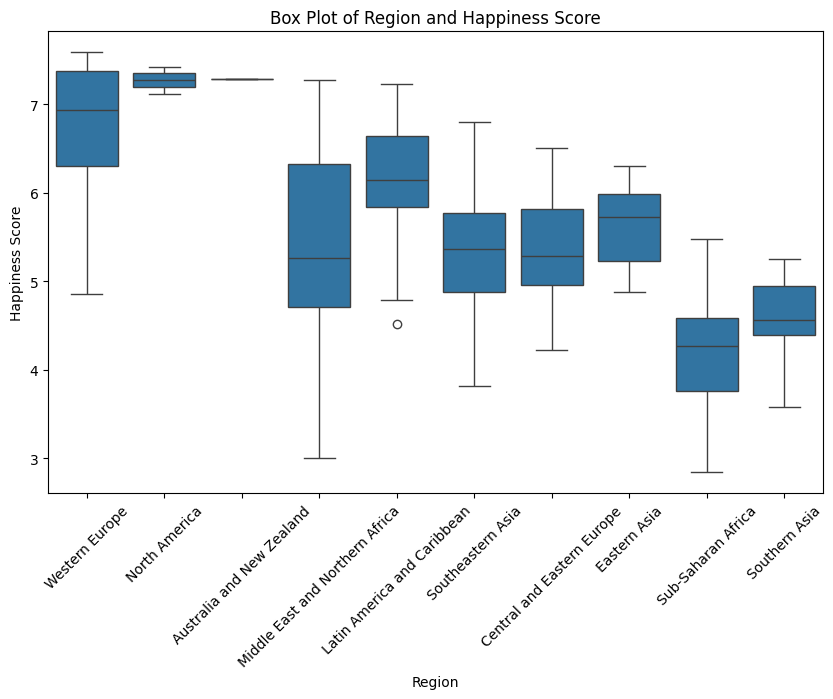

In [140]:
# Example: Box plot for Region and Happiness Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Happiness Score', data=World_Happiness_df_2015)
plt.title('Box Plot of Region and Happiness Score')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

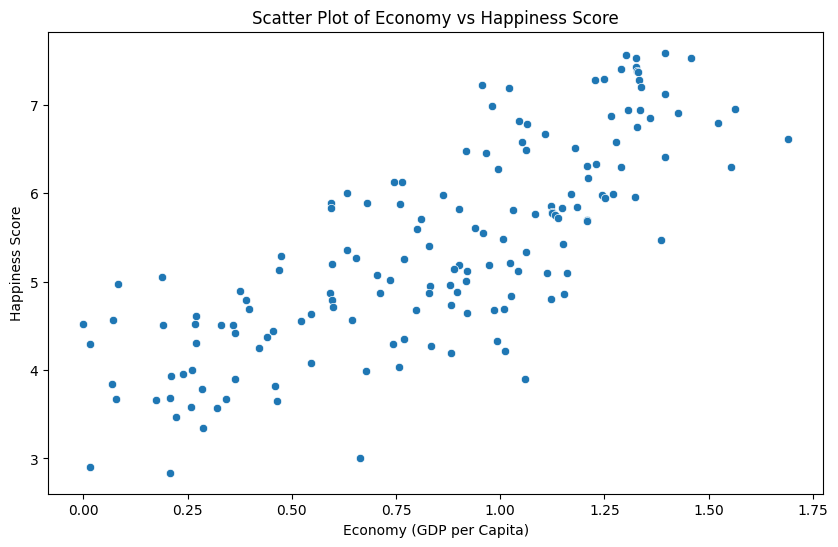

In [141]:
# Example: Scatter plot for Economy (GDP per Capita) and Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=World_Happiness_df_2015)
plt.title('Scatter Plot of Economy vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

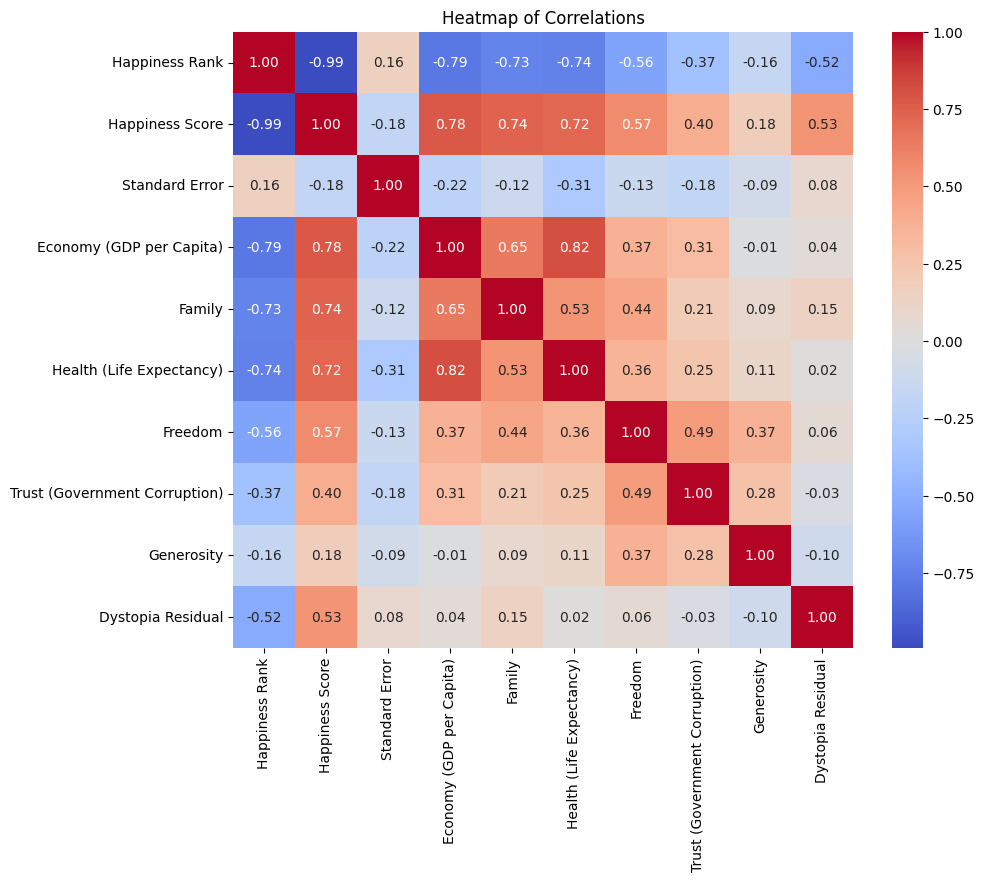

In [143]:
# Select only numeric columns
numeric_data = World_Happiness_df_2015.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

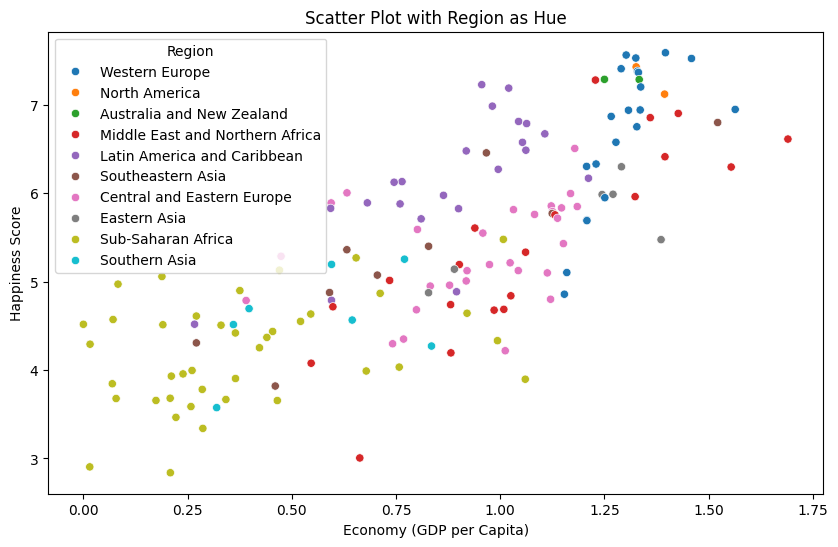

In [144]:
# Example: Adding color for Region
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', hue='Region', data=World_Happiness_df_2015)
plt.title('Scatter Plot with Region as Hue')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.legend(title='Region')
plt.show()


In [92]:
# Mean, Median, and Mode for Happiness Score
mean = World_Happiness_df_2015['Happiness Score'].mean()
median = World_Happiness_df_2015['Happiness Score'].median()
mode = World_Happiness_df_2015['Happiness Score'].mode()[0]

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 5.375734177215189
Median: 5.2325
Mode: 5.192


In [93]:
# Range, Variance, Standard Deviation, and IQR for Happiness Score
data = World_Happiness_df_2015['Happiness Score']
data_range = data.max() - data.min()
variance = data.var()
std_dev = data.std()
iqr = data.quantile(0.75) - data.quantile(0.25)

print(f"Range: {data_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")


Range: 4.747999999999999
Variance: 1.3110482091429494
Standard Deviation: 1.1450101349520665
IQR: 1.7177500000000006


In [94]:
# Skewness and Kurtosis for Happiness Score
skewness = World_Happiness_df_2015['Happiness Score'].skew()
kurtosis = World_Happiness_df_2015['Happiness Score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 0.09776909409344678
Kurtosis: -0.7760749386480148


### World_Happiness_df_2016


In [95]:
World_Happiness_df_2016.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


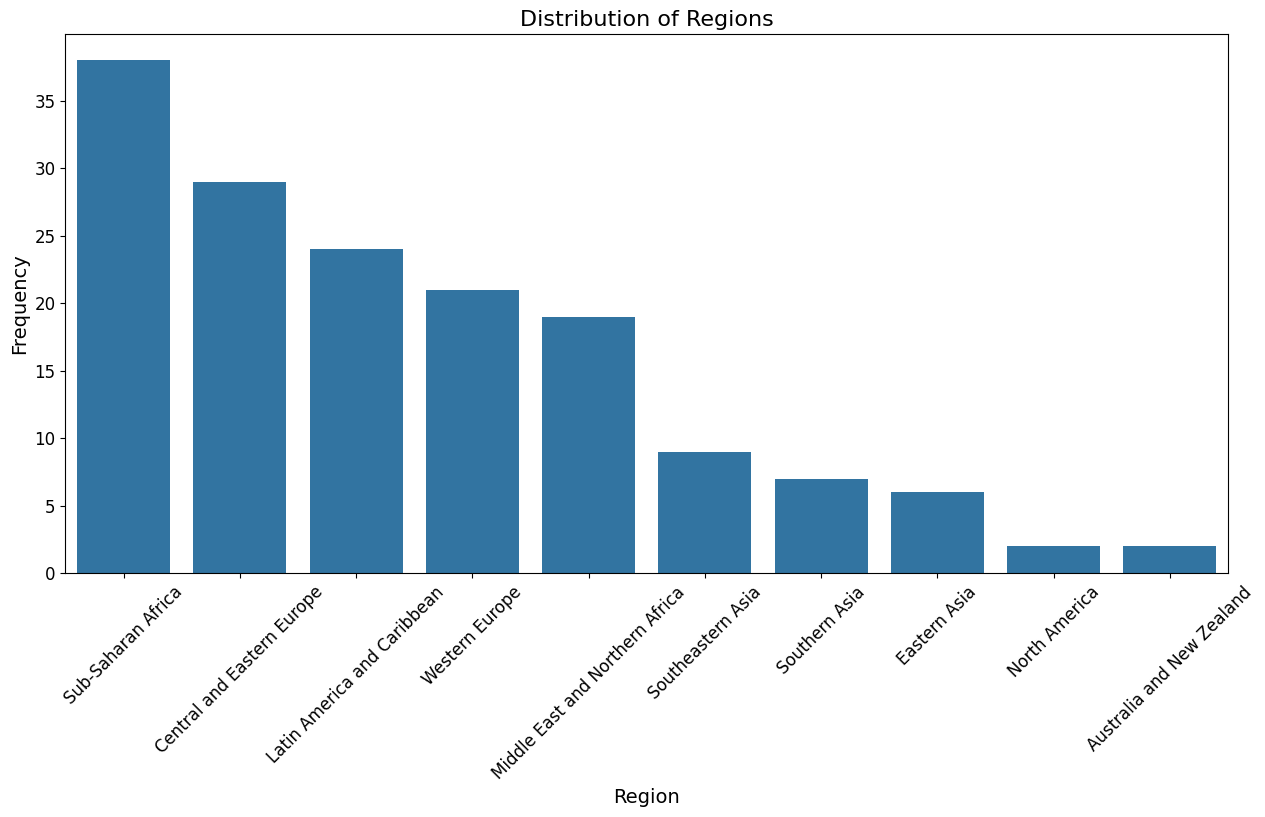

In [96]:
plt.figure(figsize=(15, 7)) 
sns.countplot(x='Region', data=World_Happiness_df_2016, order=World_Happiness_df_2015['Region'].value_counts().index)

plt.title('Distribution of Regions', fontsize=16) 
plt.xlabel('Region', fontsize=14) 
plt.ylabel('Frequency', fontsize=14)  
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

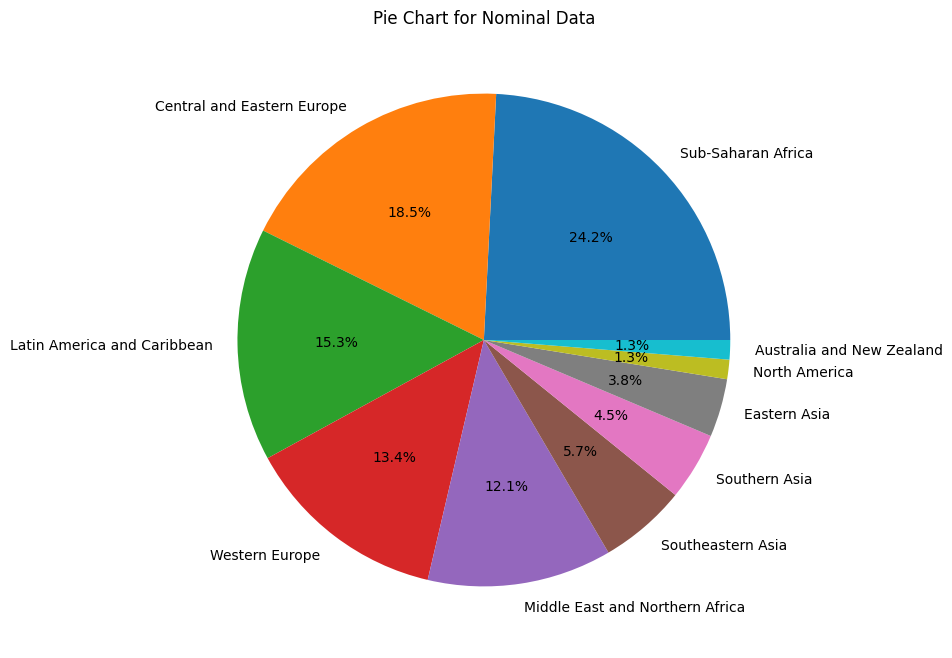

In [97]:
World_Happiness_df_2016['Region'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Pie Chart for Nominal Data')
plt.ylabel('')  # Remove default ylabel
plt.show()


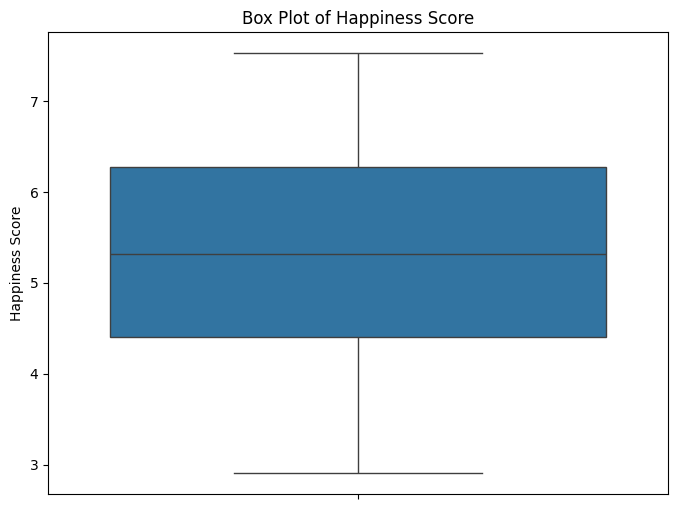

In [98]:
# Example: Box plot for Happiness Score
plt.figure(figsize=(8, 6))
sns.boxplot(y=World_Happiness_df_2016['Happiness Score'])
plt.title('Box Plot of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()


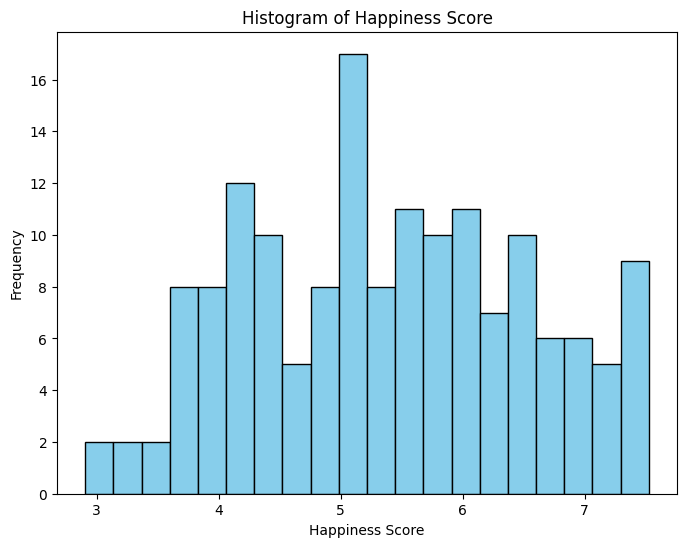

In [99]:
# Example: Histogram for Happiness Score
plt.figure(figsize=(8, 6))
plt.hist(World_Happiness_df_2016['Happiness Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


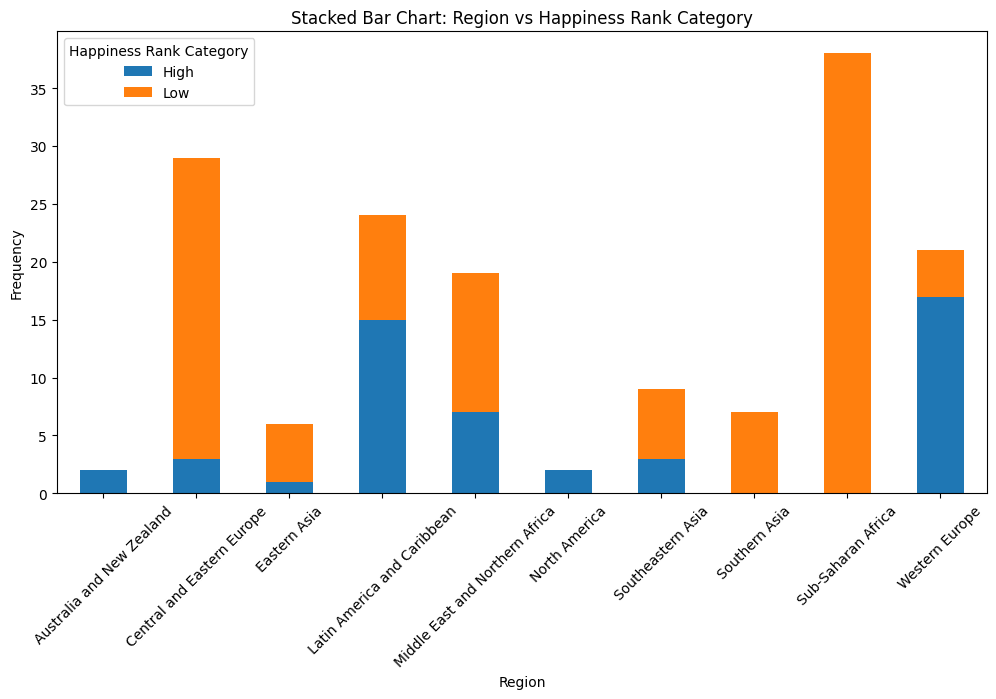

In [145]:
World_Happiness_df_2016['Happiness Rank Category'] = World_Happiness_df_2016['Happiness Rank'].apply(
    lambda x: 'High' if x <= 50 else 'Low'
)

# Create a crosstab for Region and Happiness Rank Category
crosstab = pd.crosstab(World_Happiness_df_2016['Region'], World_Happiness_df_2016['Happiness Rank Category'])

# Plot
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart: Region vs Happiness Rank Category')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

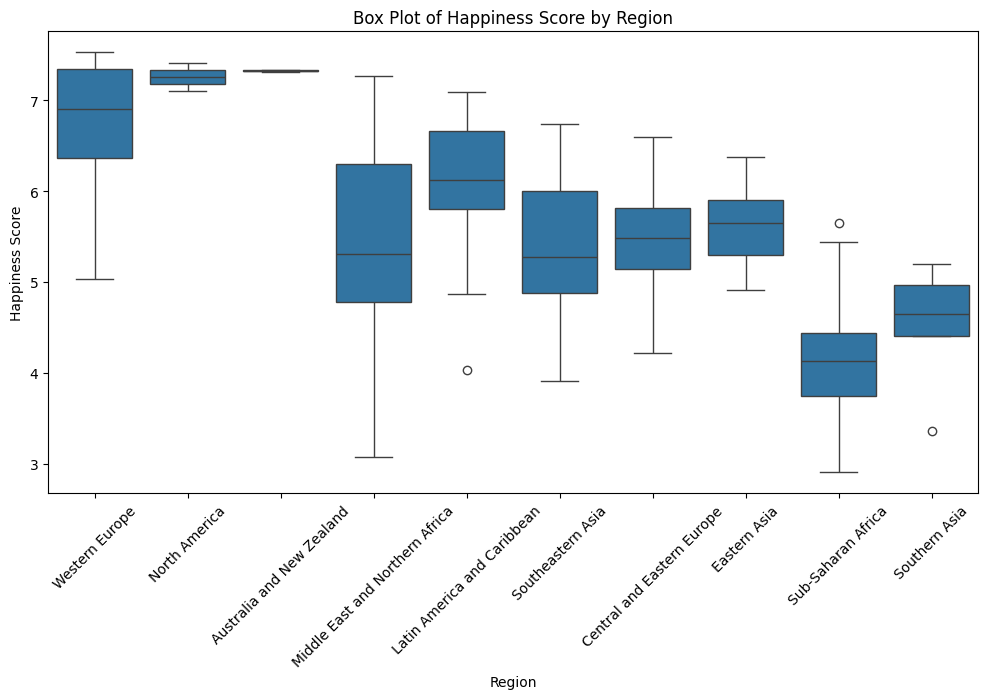

In [146]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data=World_Happiness_df_2016)
plt.title('Box Plot of Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

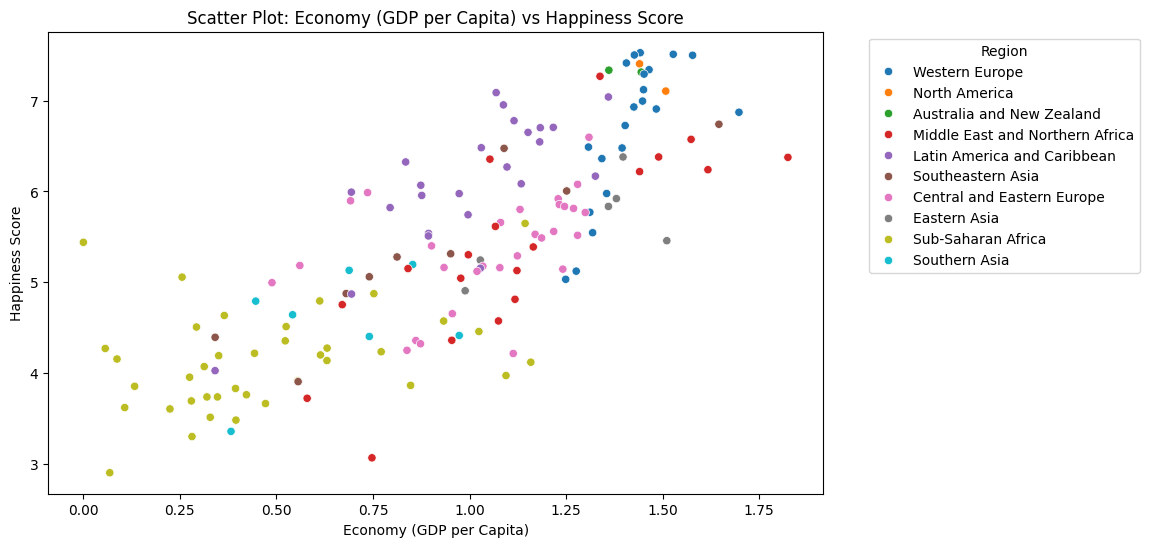

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=World_Happiness_df_2016, hue='Region')
plt.title('Scatter Plot: Economy (GDP per Capita) vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

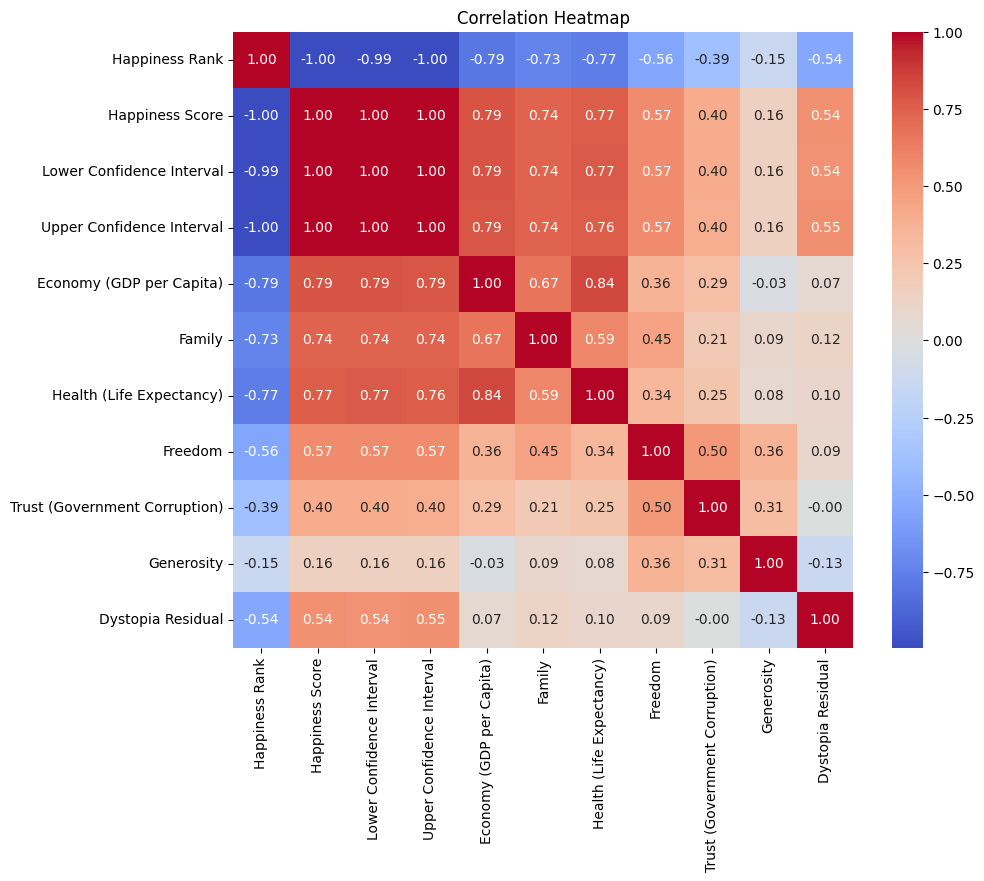

In [148]:
numeric_data = World_Happiness_df_2016.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [102]:
# Mean, Median, and Mode for Happiness Score
mean = World_Happiness_df_2016['Happiness Score'].mean()
median = World_Happiness_df_2016['Happiness Score'].median()
mode = World_Happiness_df_2016['Happiness Score'].mode()[0]

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 5.382184713375795
Median: 5.314
Mode: 3.739


In [101]:
# Range, Variance, Standard Deviation, and IQR for Happiness Score
data = World_Happiness_df_2016['Happiness Score']
data_range = data.max() - data.min()
variance = data.var()
std_dev = data.std()
iqr = data.quantile(0.75) - data.quantile(0.25)

print(f"Range: {data_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")


Range: 4.621
Variance: 1.3034184207904622
Standard Deviation: 1.1416735176005715
IQR: 1.8650000000000002


In [100]:
# Skewness and Kurtosis for Happiness Score
skewness = World_Happiness_df_2016['Happiness Score'].skew()
kurtosis = World_Happiness_df_2016['Happiness Score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 0.04368210468578225
Kurtosis: -0.8900096001646514


### World_Happiness_df_2017

In [103]:
World_Happiness_df_2017.head(1)

,Country,Happiness Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


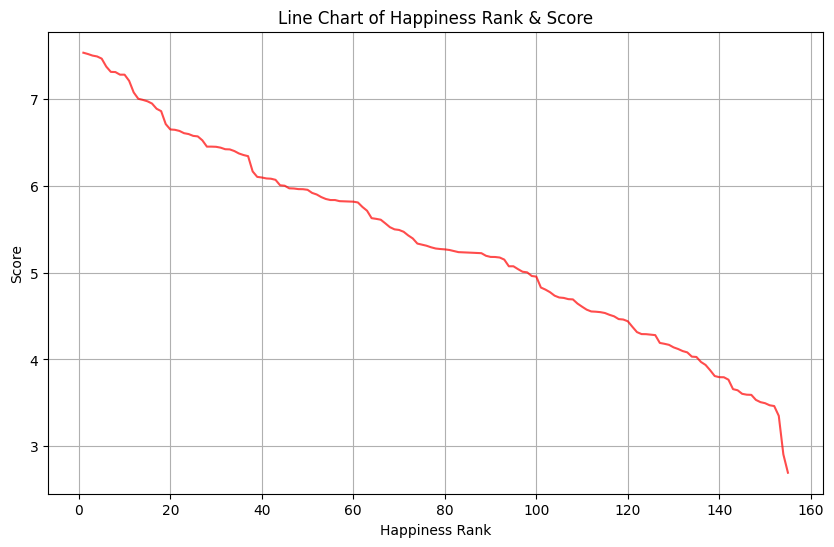

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(World_Happiness_df_2017["Happiness Rank"], World_Happiness_df_2017["Happiness.Score"], color="red", alpha=0.7)

plt.xlabel("Happiness Rank")  
plt.ylabel("Score")  
plt.title("Line Chart of Happiness Rank & Score")

plt.grid()
plt.show()

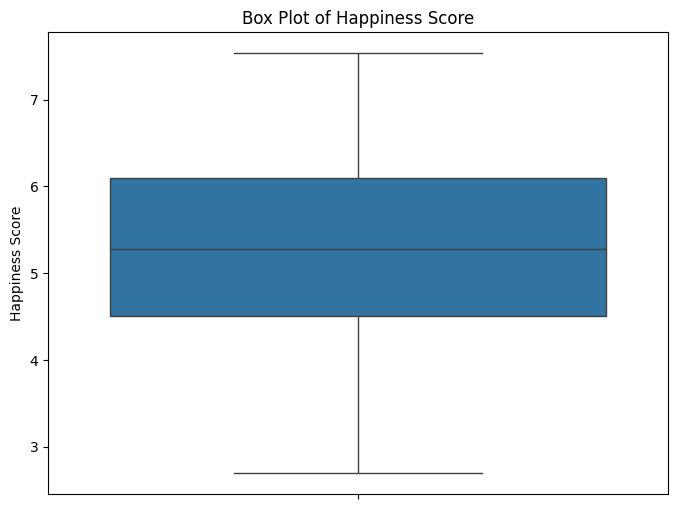

In [108]:
# Example: Box plot for Happiness Score
plt.figure(figsize=(8, 6))
sns.boxplot(y=World_Happiness_df_2017['Happiness.Score'])
plt.title('Box Plot of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()


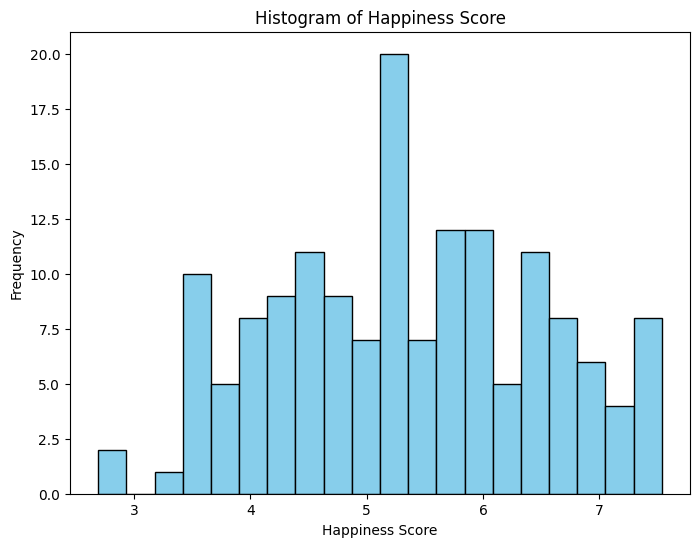

In [110]:
# Example: Histogram for Happiness Score
plt.figure(figsize=(8, 6))
plt.hist(World_Happiness_df_2017['Happiness.Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


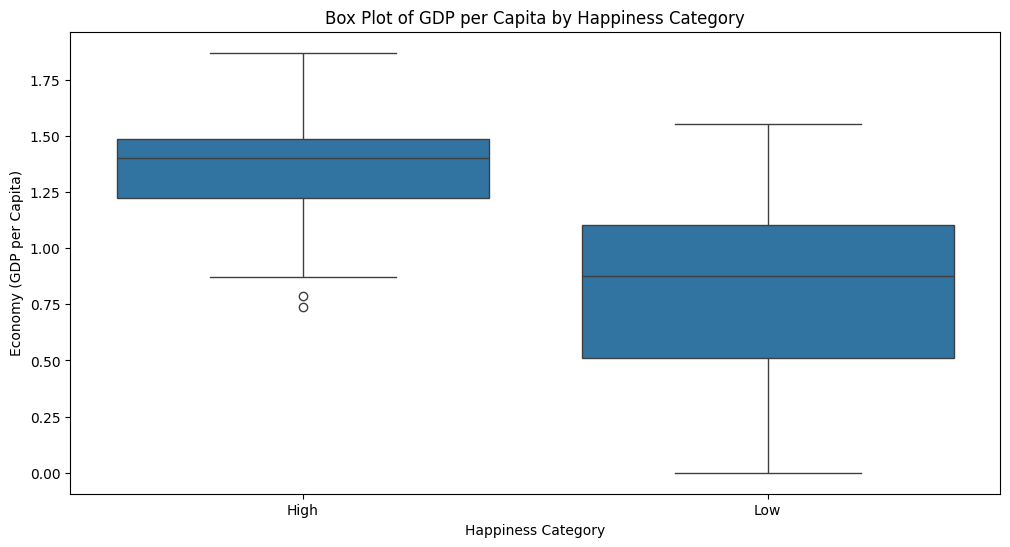

In [149]:
# Assuming 'Region' is missing, we can categorize based on 'Happiness Rank'
World_Happiness_df_2017['Happiness Category'] = World_Happiness_df_2017['Happiness Rank'].apply(
    lambda x: 'High' if x <= 50 else 'Low'
)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Happiness Category', y='Economy..GDP.per.Capita.', data=World_Happiness_df_2017)
plt.title('Box Plot of GDP per Capita by Happiness Category')
plt.xlabel('Happiness Category')
plt.ylabel('Economy (GDP per Capita)')
plt.show()


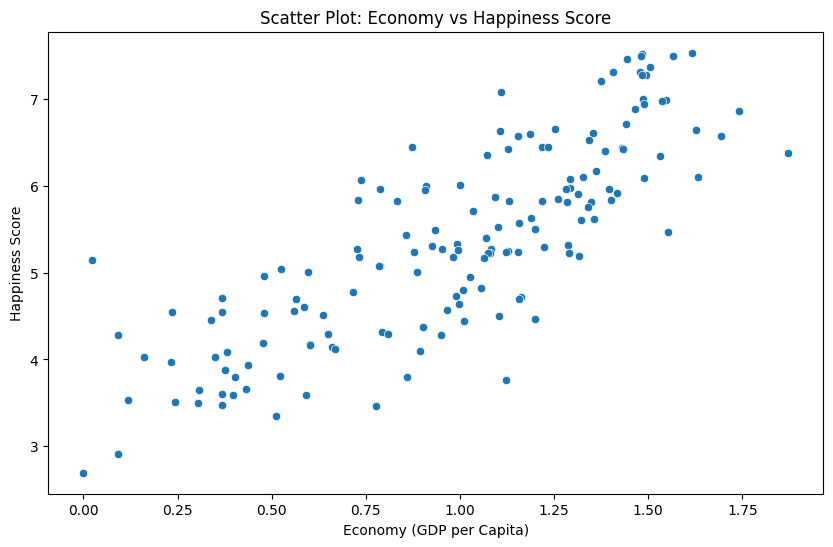

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy..GDP.per.Capita.', y='Happiness.Score', data=World_Happiness_df_2017)
plt.title('Scatter Plot: Economy vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()


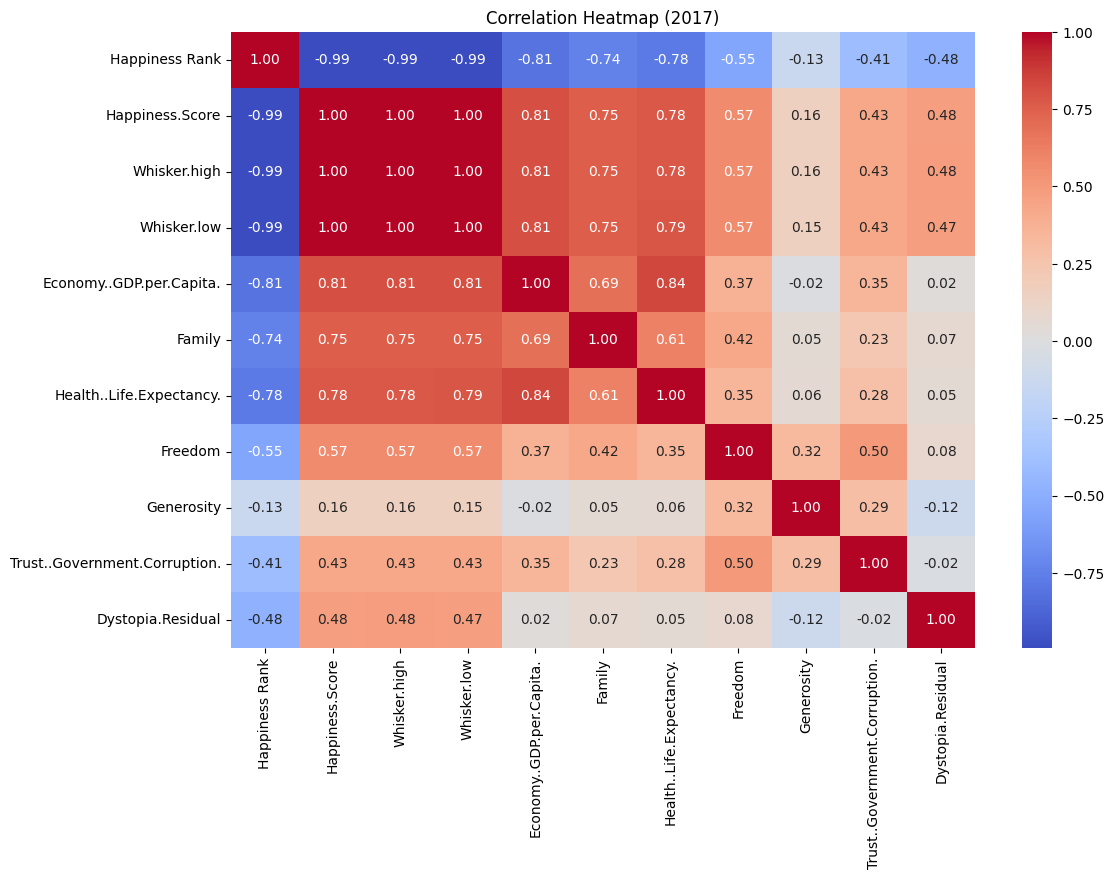

In [151]:
# Select only numerical columns
numeric_data = World_Happiness_df_2017.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (2017)')
plt.show()


In [112]:
# Mean, Median, and Mode for Happiness Score
mean = World_Happiness_df_2017['Happiness.Score'].mean()
median = World_Happiness_df_2017['Happiness.Score'].median()
mode = World_Happiness_df_2017['Happiness.Score'].mode()[0]

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 5.354019355773926
Median: 5.27899980545044
Mode: 5.07399988174438


In [114]:
# Range, Variance, Standard Deviation, and IQR for Happiness Score
data = World_Happiness_df_2017['Happiness.Score']
data_range = data.max() - data.min()
variance = data.var()
std_dev = data.std()
iqr = data.quantile(0.75) - data.quantile(0.25)

print(f"Range: {data_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")


Range: 4.844000101089479
Variance: 1.2796815163290851
Standard Deviation: 1.1312300899149939
IQR: 1.595999956130985


In [115]:
# Skewness and Kurtosis for Happiness Score
skewness = World_Happiness_df_2017['Happiness.Score'].skew()
kurtosis = World_Happiness_df_2017['Happiness.Score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 0.009553789803284486
Kurtosis: -0.7504186573250236


### World_Happiness_df_2018

In [116]:
World_Happiness_df_2018.head(1)

,Happiness Rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


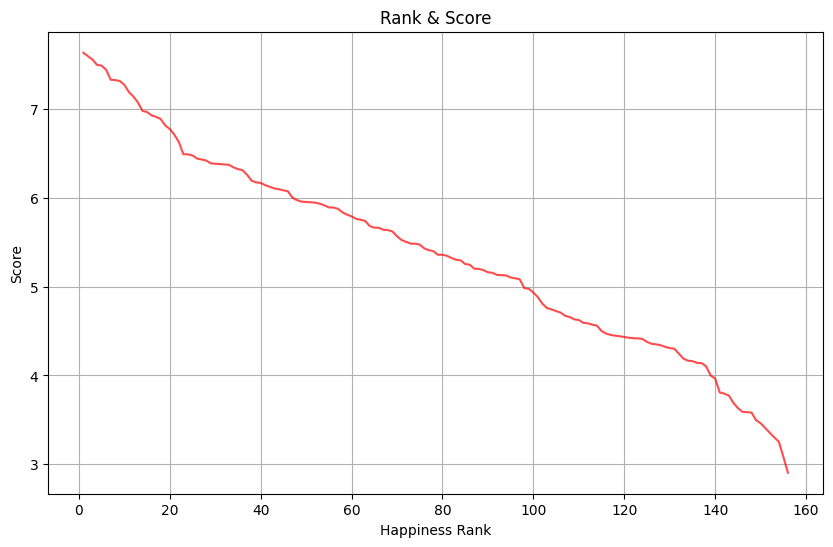

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(World_Happiness_df_2018["Happiness Rank"], World_Happiness_df_2018["Score"], color="red", alpha=0.7)

plt.xlabel("Happiness Rank")  
plt.ylabel("Score")  
plt.title("Rank & Score")

plt.grid()
plt.show()

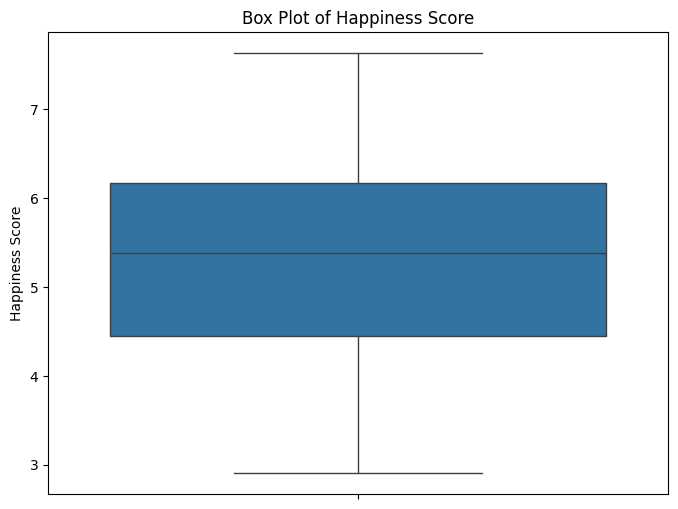

In [123]:
# Example: Box plot for Happiness Score
plt.figure(figsize=(8, 6))
sns.boxplot(y=World_Happiness_df_2018['Score'])
plt.title('Box Plot of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()


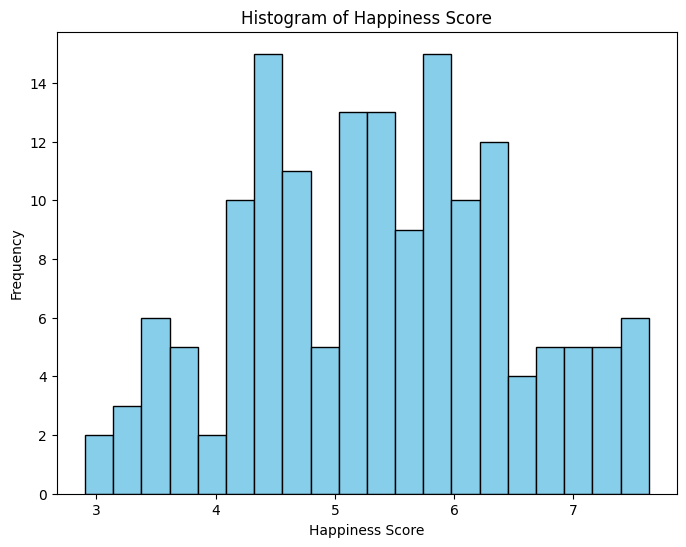

In [124]:
# Example: Histogram for Happiness Score
plt.figure(figsize=(8, 6))
plt.hist(World_Happiness_df_2018['Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


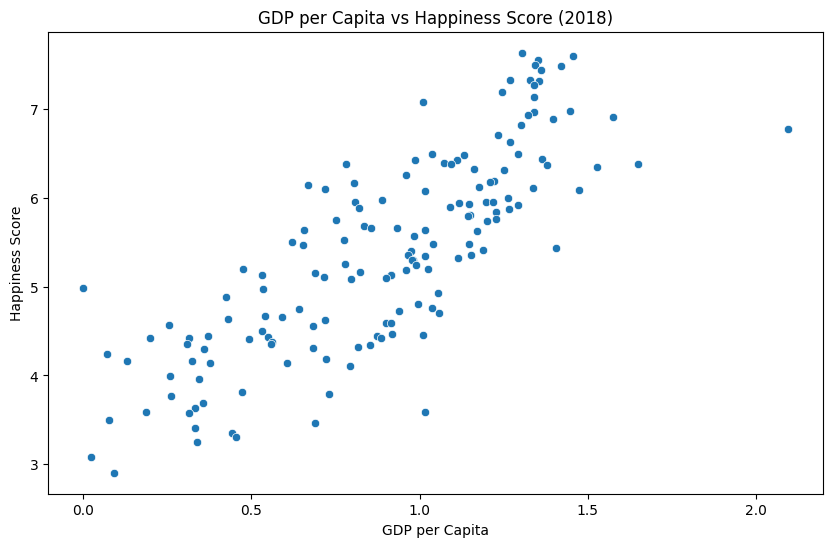

In [152]:
# Scatter plot for GDP vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data=World_Happiness_df_2018)
plt.title('GDP per Capita vs Happiness Score (2018)')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

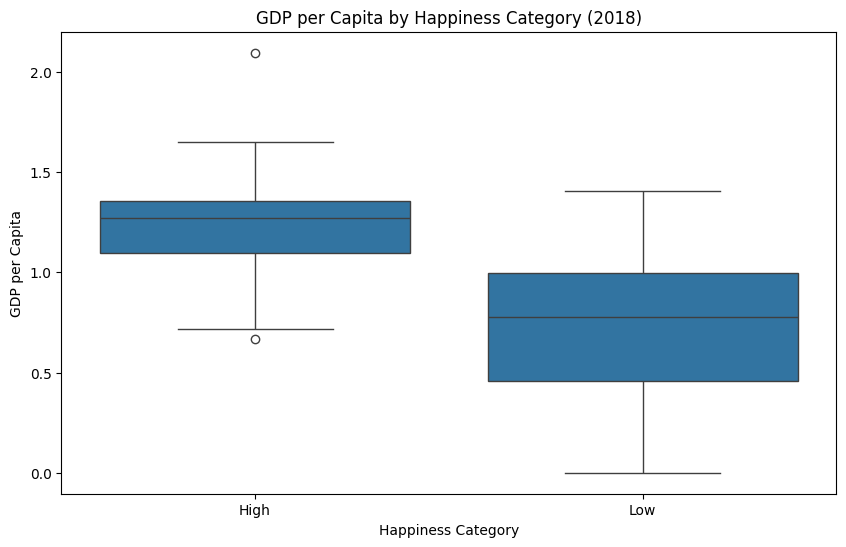

In [153]:
# Categorizing Happiness Rank into High (1-50) and Low (51+)
World_Happiness_df_2018['Happiness Category'] = World_Happiness_df_2018['Happiness Rank'].apply(
    lambda x: 'High' if x <= 50 else 'Low'
)

# Box plot for GDP per category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Happiness Category', y='GDP per capita', data=World_Happiness_df_2018)
plt.title('GDP per Capita by Happiness Category (2018)')
plt.xlabel('Happiness Category')
plt.ylabel('GDP per Capita')
plt.show()

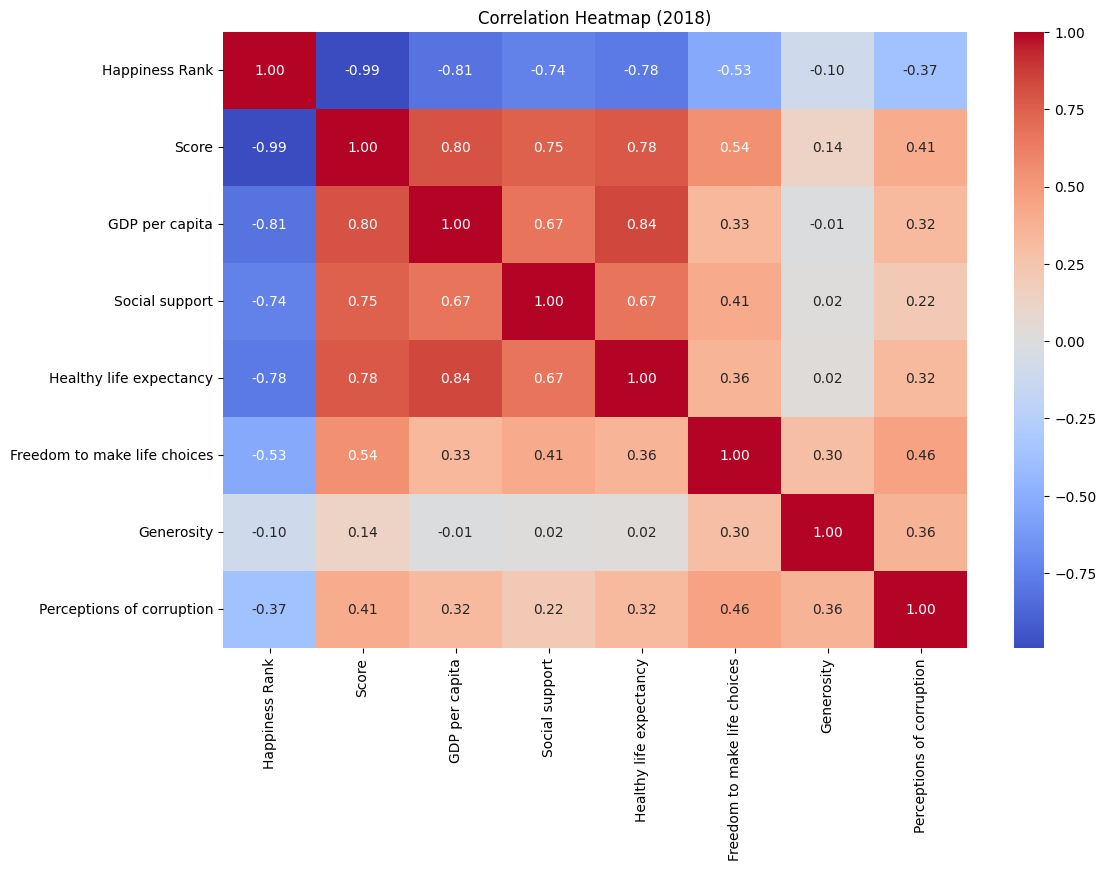

In [156]:
# Selecting only numeric columns
numeric_df = World_Happiness_df_2018.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (2018)')
plt.show()


In [125]:
# Mean, Median, and Mode for Happiness Score
mean = World_Happiness_df_2018['Score'].mean()
median = World_Happiness_df_2018['Score'].median()
mode = World_Happiness_df_2018['Score'].mode()[0]

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 5.375916666666667
Median: 5.378
Mode: 5.358


In [126]:
# Range, Variance, Standard Deviation, and IQR for Happiness Score
data = World_Happiness_df_2018['Score']
data_range = data.max() - data.min()
variance = data.var()
std_dev = data.std()
iqr = data.quantile(0.75) - data.quantile(0.25)

print(f"Range: {data_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")


Range: 4.727
Variance: 1.2532933543010751
Standard Deviation: 1.119505852731943
IQR: 1.7147499999999996


In [127]:
# Skewness and Kurtosis for Happiness Score
skewness = World_Happiness_df_2018['Score'].skew()
kurtosis = World_Happiness_df_2018['Score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 0.015179588167422637
Kurtosis: -0.7107973573560815


### World_Happiness_df_2019

In [128]:
World_Happiness_df_2019.head(1)

,Happiness Rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


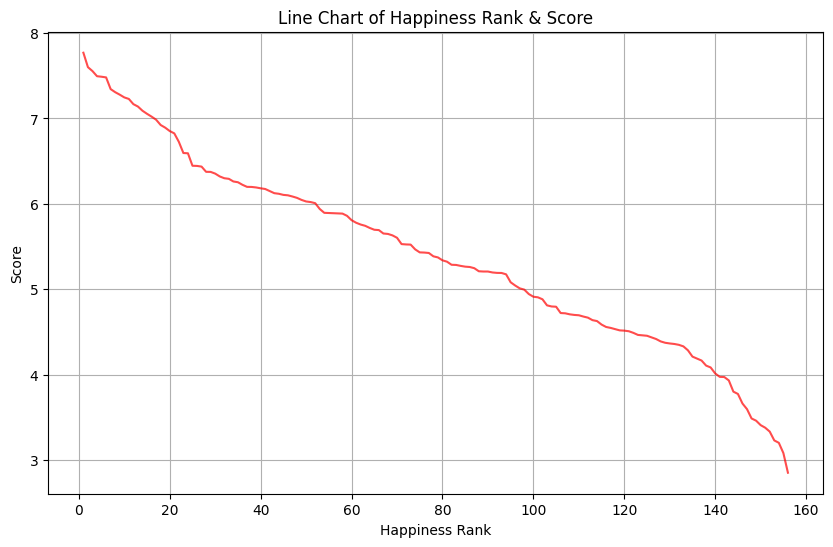

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(World_Happiness_df_2019["Happiness Rank"], World_Happiness_df_2019["Score"], color="red", alpha=0.7)

plt.xlabel("Happiness Rank")  
plt.ylabel("Score")  
plt.title("Line Chart of Happiness Rank & Score")

plt.grid()
plt.show()

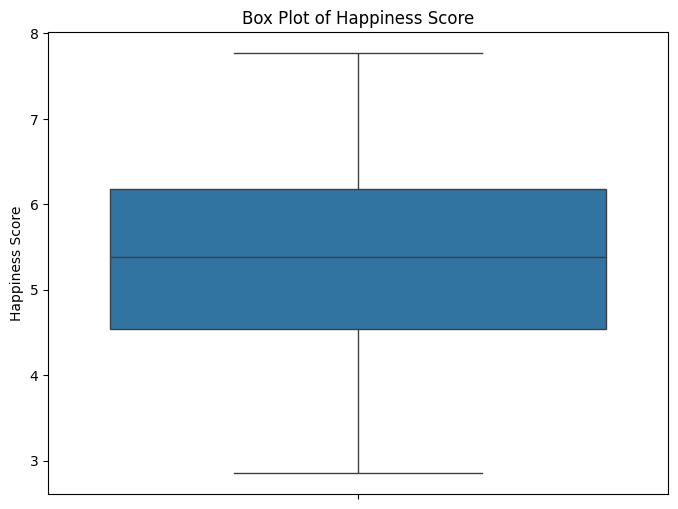

In [132]:
# Example: Box plot for Happiness Score
plt.figure(figsize=(8, 6))
sns.boxplot(y=World_Happiness_df_2019['Score'])
plt.title('Box Plot of Happiness Score')
plt.ylabel('Happiness Score')
plt.show()


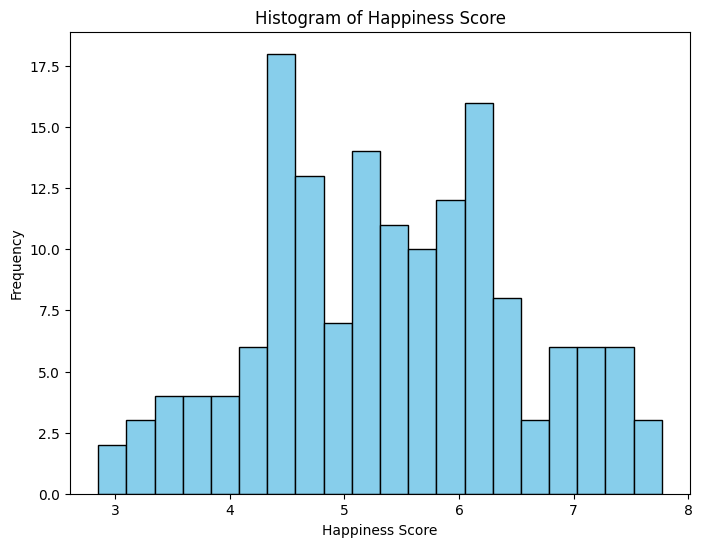

In [133]:
# Example: Histogram for Happiness Score
plt.figure(figsize=(8, 6))
plt.hist(World_Happiness_df_2019['Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


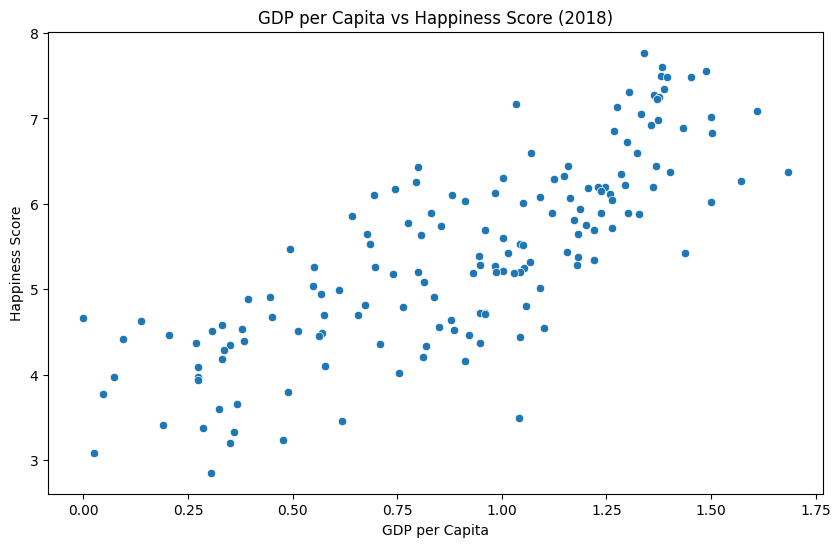

In [157]:
# Scatter plot for GDP vs Happiness Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data=World_Happiness_df_2019)
plt.title('GDP per Capita vs Happiness Score (2018)')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

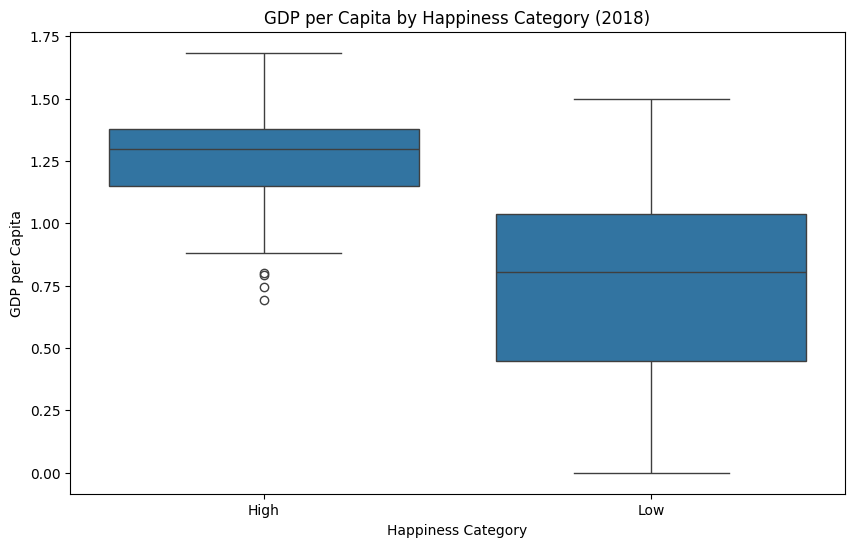

In [158]:
# Categorizing Happiness Rank into High (1-50) and Low (51+)
World_Happiness_df_2019['Happiness Category'] = World_Happiness_df_2019['Happiness Rank'].apply(
    lambda x: 'High' if x <= 50 else 'Low'
)

# Box plot for GDP per category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Happiness Category', y='GDP per capita', data=World_Happiness_df_2019)
plt.title('GDP per Capita by Happiness Category (2018)')
plt.xlabel('Happiness Category')
plt.ylabel('GDP per Capita')
plt.show()

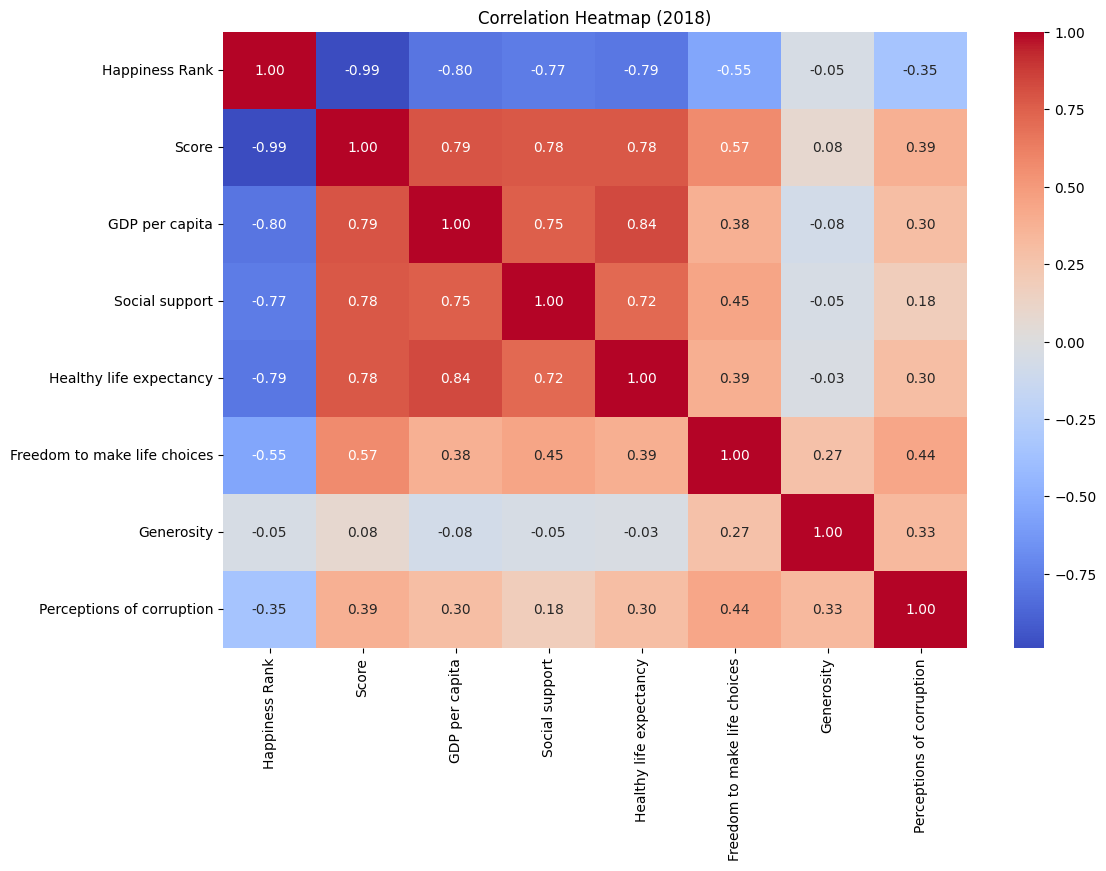

In [159]:
# Selecting only numeric columns
numeric_df = World_Happiness_df_2019.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (2018)')
plt.show()


In [134]:
# Mean, Median, and Mode for Happiness Score
mean = World_Happiness_df_2019['Score'].mean()
median = World_Happiness_df_2019['Score'].median()
mode = World_Happiness_df_2019['Score'].mode()[0]

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")


Mean: 5.407096153846155
Median: 5.3795
Mode: 5.208


In [136]:
# Range, Variance, Standard Deviation, and IQR for Happiness Score
data = World_Happiness_df_2019['Score']
data_range = data.max() - data.min()
variance = data.var()
std_dev = data.std()
iqr = data.quantile(0.75) - data.quantile(0.25)

print(f"Range: {data_range}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")


Range: 4.916
Variance: 1.2390358423076921
Standard Deviation: 1.1131198687956712
IQR: 1.6399999999999997


In [138]:
# Skewness and Kurtosis for Happiness Score
skewness = World_Happiness_df_2019['Score'].skew()
kurtosis = World_Happiness_df_2019['Score'].kurt()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: 0.01144994949132211
Kurtosis: -0.6083753495644775


# Answer Qustions

#### What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?

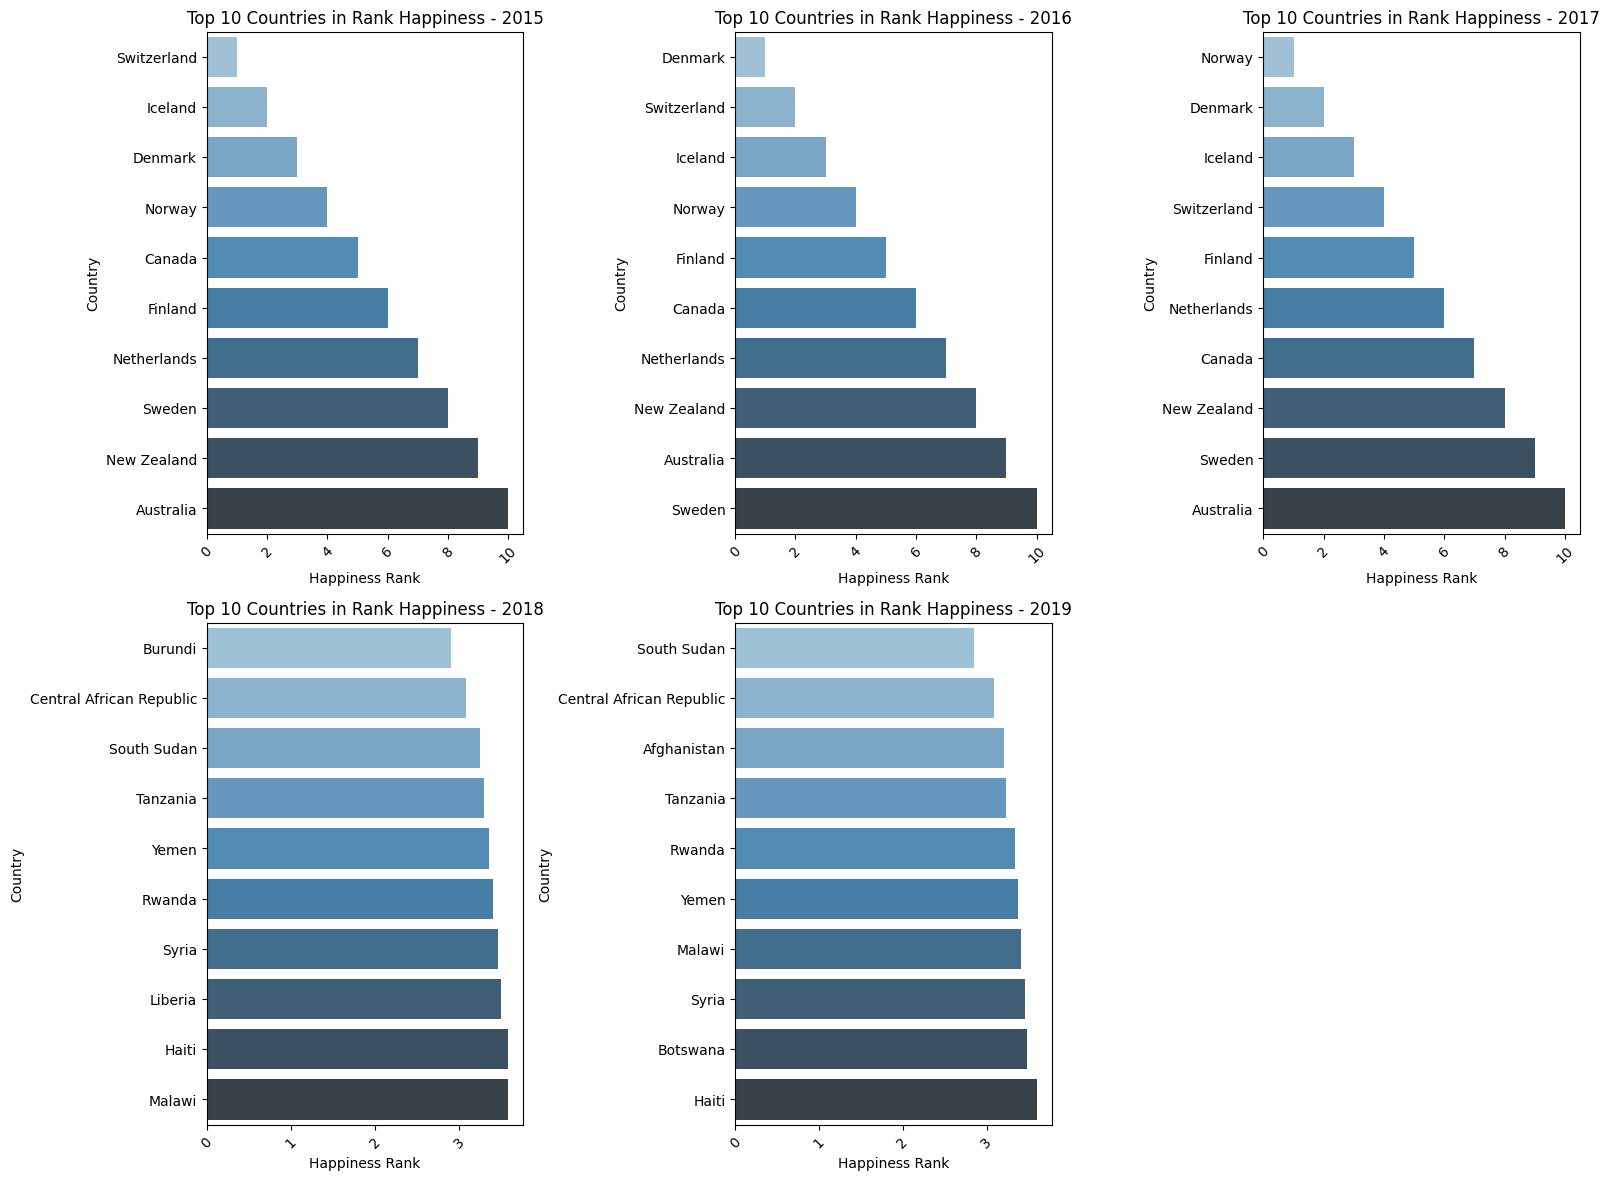

In [167]:
def get_happiness_column(df, year):
    if year == 2015 or year == 2016 or year == 2017:
        return 'Happiness Rank', 'Happiness Score'
    else:  
        return 'Score', 'Score'

def plot_top_countries_grid(df, year, plot_position):
    happiness_rank_column, happiness_score_column = get_happiness_column(df, year)
    
    if year == 2018 or year == 2019:
        df = df.rename(columns={'Country or region': 'Country'})
    
    top_countries = df.sort_values(happiness_rank_column).head(10)
    
    plt.subplot(2, 3, plot_position)
    sns.barplot(x=happiness_rank_column, y='Country', data=top_countries, palette="Blues_d", hue='Country', legend=False)
    plt.title(f"Top 10 Countries in Rank Happiness - {year}")
    plt.xlabel('Happiness Rank')
    plt.ylabel('Country')
    plt.xticks(rotation=45)

plt.figure(figsize=(16, 12))

plot_top_countries_grid(World_Happiness_df_2015, 2015, 1)
plot_top_countries_grid(World_Happiness_df_2016, 2016, 2)
plot_top_countries_grid(World_Happiness_df_2017, 2017, 3)
plot_top_countries_grid(World_Happiness_df_2018, 2018, 4)
plot_top_countries_grid(World_Happiness_df_2019, 2019, 5)

plt.tight_layout()
plt.show()

#### How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

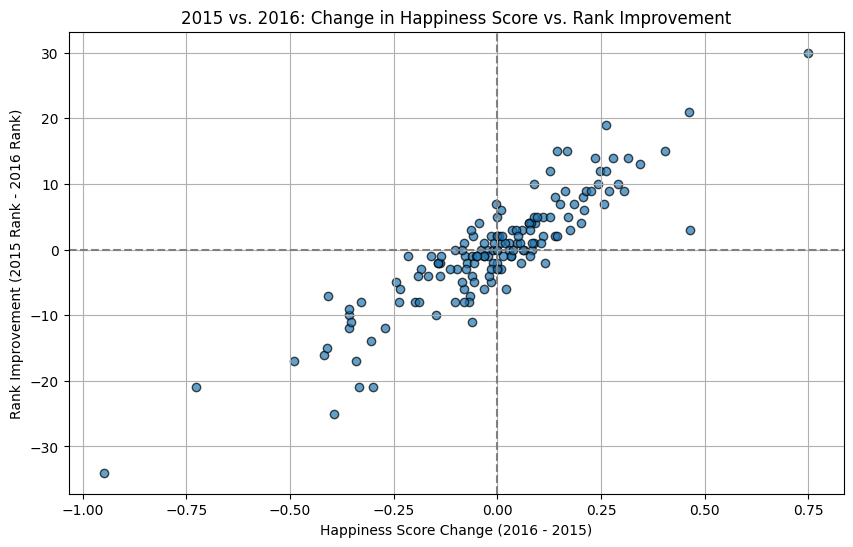

In [ ]:
# country 2015 & 2016 marg
df2015_2016 = pd.merge(World_Happiness_df_2015, World_Happiness_df_2016, on='Country', suffixes=('_2015', '_2016'))

df2015_2016['Rank Improvement'] = df2015_2016['Happiness Rank_2015'] - df2015_2016['Happiness Rank_2016']
df2015_2016['Score Change'] = df2015_2016['Happiness Score_2016'] - df2015_2016['Happiness Score_2015']

plt.figure(figsize=(10,6))
plt.scatter(df2015_2016['Score Change'], df2015_2016['Rank Improvement'], alpha=0.7, edgecolor='k')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("2015 vs. 2016: Change in Happiness Score vs. Rank Improvement")
plt.xlabel("Happiness Score Change (2016 - 2015)")
plt.ylabel("Rank Improvement (2015 Rank - 2016 Rank)")
plt.grid(True)
plt.show()

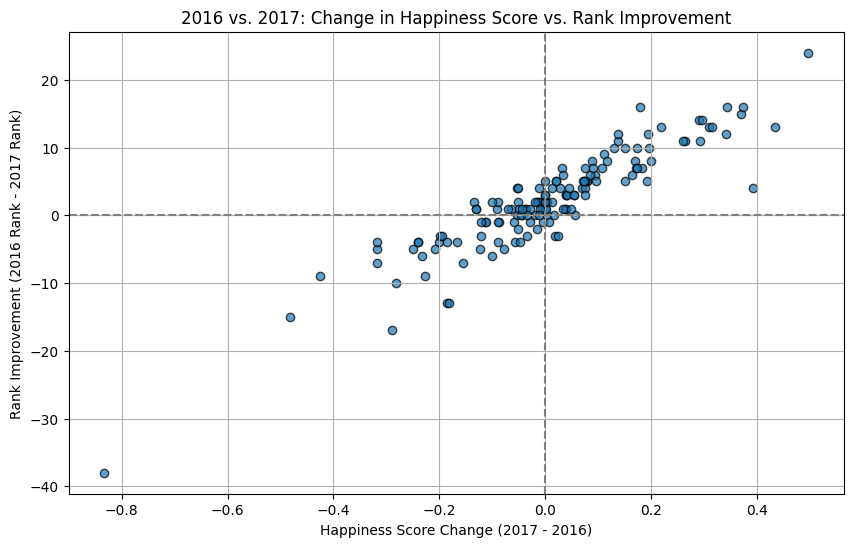

In [ ]:
World_Happiness_df_2017_re = World_Happiness_df_2017.rename(columns={'Happiness.Score': 'Happiness Score'})

# country 2016 & 2017 marg
df_16_17 = pd.merge(World_Happiness_df_2016, World_Happiness_df_2017_re, on='Country', suffixes=('_2016', '_2017'))


df_16_17['Rank Improvement'] = df_16_17['Happiness Rank_2016'] - df_16_17['Happiness Rank_2017']
df_16_17['Score Change'] = df_16_17['Happiness Score_2017'] - df_16_17['Happiness Score_2016']


plt.figure(figsize=(10,6))
plt.scatter(df_16_17['Score Change'], df_16_17['Rank Improvement'], alpha=0.7, edgecolor='k')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("2016 vs. 2017: Change in Happiness Score vs. Rank Improvement")
plt.xlabel("Happiness Score Change (2017 - 2016)")
plt.ylabel("Rank Improvement (2016 Rank - 2017 Rank)")
plt.grid(True)
plt.show()

#### Did any country experience a significant increase or decrease in happiness?

In [183]:
# Store in a dictionary
data = {
    2015: World_Happiness_df_2015,
    2016: World_Happiness_df_2016,
    2017: World_Happiness_df_2017,
    2018: World_Happiness_df_2018,
    2019: World_Happiness_df_2019
}

# Standardizing column names to extract happiness scores and country names
column_mapping = {
    2015: {"Country": "Country", "Happiness Score": "Happiness Score"},
    2016: {"Country": "Country", "Happiness Score": "Happiness Score"},
    2017: {"Country": "Country", "Happiness.Score": "Happiness Score"},
    2018: {"Country or region": "Country", "Score": "Happiness Score"},
    2019: {"Country or region": "Country", "Score": "Happiness Score"}
}

for year, df in data.items():
    df.rename(columns=column_mapping[year], inplace=True)
    data[year] = df[["Country", "Happiness Score"]]

# Merging all datasets on the Country column
df_merged = data[2015]
for year in range(2016, 2020):
    df_merged = df_merged.merge(data[year], on="Country", how="outer", suffixes=("", f"_{year}"))

# Print column names for debugging
print("Column Names after merging:", df_merged.columns)

# Ensure correct column names
if "Happiness Score_2019" not in df_merged.columns:
    print("Available columns:", df_merged.columns)

# Compute the change in happiness score from 2015 to 2019
df_merged["Change_2015_2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score"]

# Identify the countries with the most significant increase and decrease
most_increase = df_merged.nlargest(5, "Change_2015_2019")[["Country", "Change_2015_2019"]]
most_decrease = df_merged.nsmallest(5, "Change_2015_2019")[["Country", "Change_2015_2019"]]

# Display the results
print("Countries with the Largest Increase in Happiness Score:")
print(most_increase)

print("\nCountries with the Largest Decrease in Happiness Score:")
print(most_decrease)



Column Names after merging: Index(['Country', 'Happiness Score', 'Happiness Score_2016',
       'Happiness Score_2017', 'Happiness Score_2018', 'Happiness Score_2019'],
      dtype='object')
Countries with the Largest Increase in Happiness Score:
          Country  Change_2015_2019
14          Benin             1.543
69    Ivory Coast             1.289
152          Togo             1.246
57       Honduras             1.072
21   Burkina Faso             1.000

Countries with the Largest Decrease in Happiness Score:
       Country  Change_2015_2019
165  Venezuela            -2.103
81     Lesotho            -1.096
168     Zambia            -1.022
169   Zimbabwe            -0.947
56       Haiti            -0.921


C:\Users\ryan5\AppData\Local\Temp\ipykernel_9672\2695857168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping[year], inplace=True)
C:\Users\ryan5\AppData\Local\Temp\ipykernel_9672\2695857168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping[year], inplace=True)
C:\Users\ryan5\AppData\Local\Temp\ipykernel_9672\2695857168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

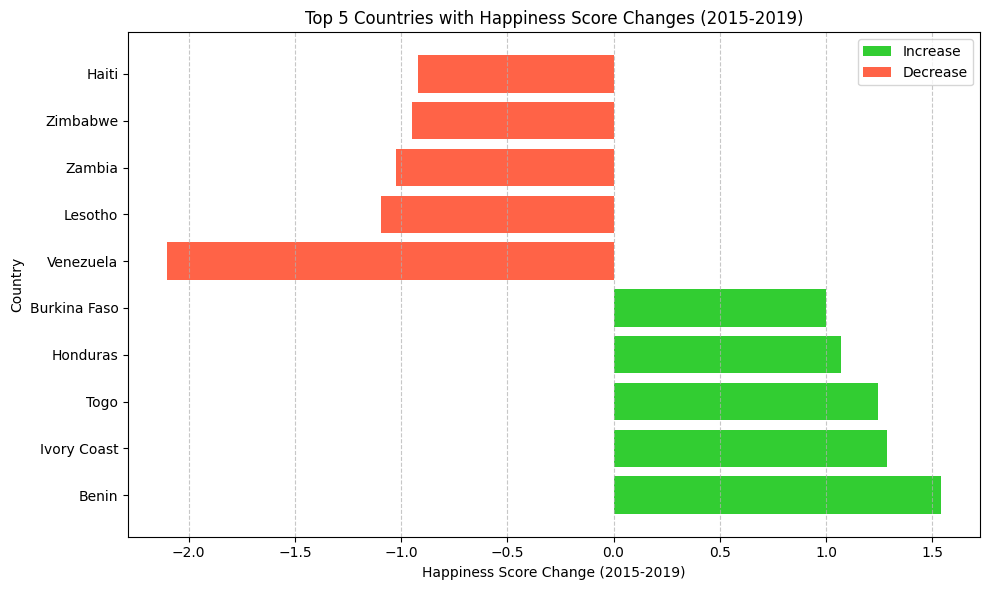

In [184]:

# Rename columns and select relevant data
for year, df in data.items():
    df.rename(columns=column_mapping[year], inplace=True)
    data[year] = df[["Country", "Happiness Score"]]

# Merge datasets
df_merged = data[2015]
for year in range(2016, 2020):
    df_merged = df_merged.merge(data[year], on="Country", how="outer", suffixes=("", f"_{year}"))

# Calculate happiness score change
df_merged["Change_2015_2019"] = df_merged["Happiness Score_2019"] - df_merged["Happiness Score"]

# Identify top increases and decreases
most_increase = df_merged.nlargest(5, "Change_2015_2019")[["Country", "Change_2015_2019"]]
most_decrease = df_merged.nsmallest(5, "Change_2015_2019")[["Country", "Change_2015_2019"]]

# Plot results
plt.figure(figsize=(10, 6))
plt.barh(most_increase["Country"], most_increase["Change_2015_2019"], color='limegreen', label='Increase')
plt.barh(most_decrease["Country"], most_decrease["Change_2015_2019"], color='tomato', label='Decrease')
plt.xlabel("Happiness Score Change (2015-2019)")
plt.ylabel("Country")
plt.title("Top 5 Countries with Happiness Score Changes (2015-2019)")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### What are the top 5 countries that showed the most improvement in "Trust in Government" between 2015 and 2016?

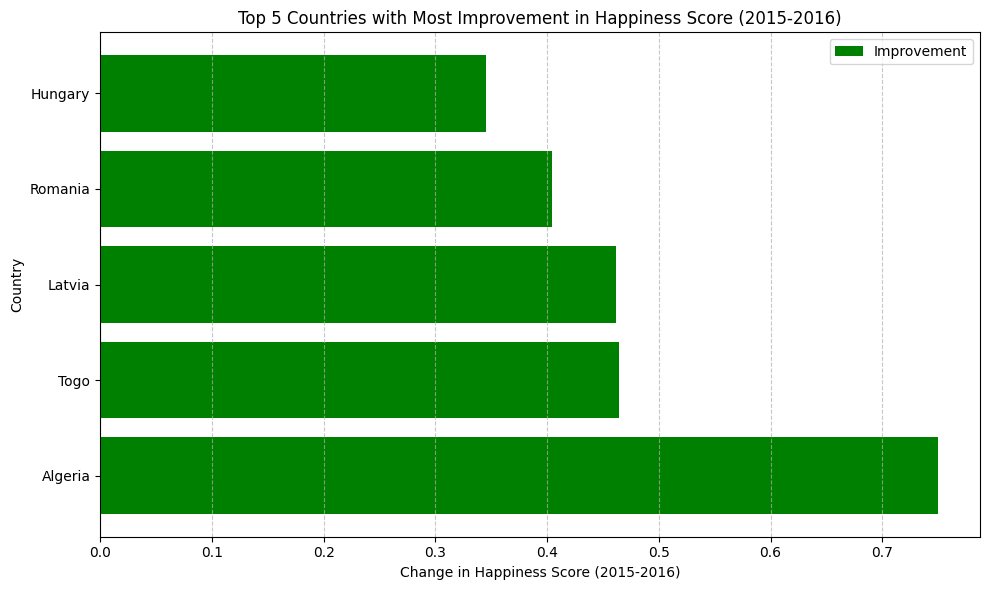

In [199]:
# Step 1: Standardize column names for Happiness Score
happiness_mapping = {
    2015: {"Country": "Country", "Happiness Score": "Happiness Score"},
    2016: {"Country": "Country", "Happiness Score": "Happiness Score"}
}

# Step 2: Rename columns and select relevant data
for year, df in data.items():
    if year in [2015, 2016]:
        df.rename(columns=happiness_mapping[year], inplace=True)
        data[year] = df[["Country", "Happiness Score"]]

# Step 3: Merge datasets
df_merged = data[2015].merge(data[2016], on="Country", how="outer", suffixes=("_2015", "_2016"))

# Step 4: Calculate change in Happiness Score
df_merged["Change_2015_2016"] = df_merged["Happiness Score_2016"] - df_merged["Happiness Score_2015"]

# Step 5: Identify top 5 countries with the most improvement
top_improvement = df_merged.nlargest(5, "Change_2015_2016")[["Country", "Change_2015_2016"]]

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_improvement["Country"], top_improvement["Change_2015_2016"], color='green', label='Improvement')
plt.xlabel("Change in Happiness Score (2015-2016)")
plt.ylabel("Country")
plt.title("Top 5 Countries with Most Improvement in Happiness Score (2015-2016)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()